### CNN on Covid X-Ray dataset

Convolutional neural network to perform image classification of covid and non-covid chest X-rays.

Three folders have been created (Test, Train, Validation) containing images of 2 classes 'Covid', 'Normal'. A total of 69 images of 'Covid' and 25 images of 'Normal'. A Train/Test split of 70/30% has been assigned. With a 80/20% split between Train and Validate sets.

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [8]:
# Load an image from the dataset
img = image.load_img("C:/Users/leftf/OneDrive/Desktop/Covid - NG/Training/Covid/01E.jpeg")

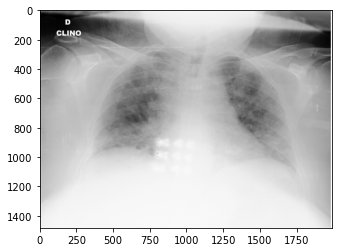

In [9]:
# Display the image
plt.imshow(img)

In [30]:
# Check image dimensions
cv2.imread("C:/Users/leftf/OneDrive/Desktop/Covid - NG/Training/Covid/01E.jpeg").shape

(1482, 1989, 3)

The above image has dimensions of 1482 x 1989 x 3. The image is RGB as it has a 3rd dimension, making it 3-dimesional.

In [31]:
# Look at the matrix of this image
image_1 = cv2.imread("C:/Users/leftf/OneDrive/Desktop/Covid - NG/Training/Covid/01E.jpeg")
image_1

array([[[182, 182, 182],
        [169, 169, 169],
        [152, 152, 152],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[165, 165, 165],
        [150, 150, 150],
        [138, 138, 138],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[146, 146, 146],
        [134, 134, 134],
        [128, 128, 128],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[243, 243, 243],
        [244, 244, 244],
        [245, 245, 245],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[245, 245, 245],
        [245, 245, 245],
        [245, 245, 245],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

In [32]:
image_1.min()

0

In [33]:
image_1.max()

255

The values of the matrix are between 0 and 255.

In [34]:
# Normalise data (scale data)
# Formating the arrays (dividing each pixel into 255 steps, so that the values are normalised)

train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [35]:
# Train set
train_dataset = train.flow_from_directory('C:/Users/leftf/OneDrive/Desktop/Covid - NG/Training/',
                                        target_size = (300,300),    # resize image to 300 x 300
                                        batch_size = 3,             # batch is for training            
                                        class_mode = 'binary')      # binary as there is only 2 possible classifications

# Validation set
validation_dataset = validation.flow_from_directory('C:/Users/leftf/OneDrive/Desktop/Covid - NG/Validation/',
                                        target_size = (300,300),    # resize image to 300 x 300
                                        batch_size = 3,             # batch is for training            
                                        class_mode = 'binary')      # binary as there is only 2 possible classifications

Found 52 images belonging to 2 classes.
Found 13 images belonging to 2 classes.


Its found all 65 images consisting of the 2 classes ('Covid' and 'Normal') that have been assigned between Training and validation.

In [36]:
# See which classes have been assigned 0 and 1
train_dataset.class_indices

{'Covid': 0, 'Normal': 1}

In [37]:
# View all 64 elements of both classes
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [38]:
# Design the Convolutional Neural Network
                      
# 1st layer. Using an input shape of 300 x 300 x 3
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3), activation = 'relu',input_shape =(300,300,3)), # 3x3 window
                                    tf.keras.layers.MaxPool2D(2,2),                         # Pooling Layer
                                    
                                    # 2nd layer (without input shape)
                                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),   # 32 nodes, 3x3 window
                                    tf.keras.layers.MaxPool2D(2,2),                          # Pooling Layer
                                    
                                    # 3rd Layer
                                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),   # 32 nodes, 3x3 window
                                    tf.keras.layers.MaxPool2D(2,2),                          # Pooling Layer
                                    
                                    
                                    # Flatten 
                                    tf.keras.layers.Flatten(),      # turn the 2D array into a 1D array
                                    
                                
                                    # Output Layer            
                                    tf.keras.layers.Dense(1, activation='sigmoid')])          # 1 node              

Activation functions used: relu: tensorflow rectified linear unit. 

In [39]:
# Compile the model
model.compile(loss='binary_crossentropy',       # loss function: what aspect we want to minimise as model progresses
             optimizer = 'adam',                # chosen optimiser
             metrics=['accuracy'])              # we want to analyse accuracy metric

In [40]:
# Fit the model
model_fit = model.fit(train_dataset,
                     epochs = 10,
                     validation_data=validation_dataset)

Epoch 1/10
18/18 [==============================] - 4s 224ms/step - loss: 0.7243 - accuracy: 0.5358 - val_loss: 0.5669 - val_accuracy: 0.6923
Epoch 2/10
18/18 [==============================] - 4s 201ms/step - loss: 0.4716 - accuracy: 0.8172 - val_loss: 0.3479 - val_accuracy: 0.7692
Epoch 3/10
18/18 [==============================] - 4s 215ms/step - loss: 0.2102 - accuracy: 0.9094 - val_loss: 0.1861 - val_accuracy: 0.9231
Epoch 4/10
18/18 [==============================] - 4s 205ms/step - loss: 0.1167 - accuracy: 0.9032 - val_loss: 0.0925 - val_accuracy: 0.9231
Epoch 5/10
18/18 [==============================] - 4s 211ms/step - loss: 0.0159 - accuracy: 1.0000 - val_loss: 0.0260 - val_accuracy: 1.0000
Epoch 6/10
18/18 [==============================] - 4s 214ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0860 - val_accuracy: 0.9231
Epoch 7/10
18/18 [==============================] - 4s 227ms/step - loss: 7.0284e-04 - accuracy: 1.0000 - val_loss: 0.0866 - val_accuracy: 0.9231
Ep

Good accuracy, as Training accuracy is 100% and Validation accuracy is 92%.

### Test the model on 'Test' dataset

In [48]:
# Test dataset path
test_path = 'C:/Users/leftf/OneDrive/Desktop/Covid - NG/Testing'

In [49]:
# View test set image list
for i in os.listdir(dir_path):
    print(i)

covid-19-pneumonia-12.jpg
covid-19-pneumonia-14-PA.png
covid-19-pneumonia-15-PA.jpg
E63574A7-4188-4C8D-8D17-9D67A18A1AFA.jpeg
F63AB6CE-1968-4154-A70F-913AF154F53D.jpeg
FE9F9A5D-2830-46F9-851B-1FF4534959BE.jpeg
gr1_lrg-b.jpg
kjr-21-e24-g002-l-a.jpg
kjr-21-e24-g003-l-a.jpg
kjr-21-e25-g001-l-a.jpg
lancet-case2b.jpg
nCoV-radiol.2020200269.fig1-day7.jpeg
nejmc2001573_f1a.jpeg
nejmoa2001191_f1-PA.jpeg
nejmoa2001191_f3-PA.jpeg
nejmoa2001191_f4.jpeg
NORMAL2-IM-0616-0001.jpeg
NORMAL2-IM-0627-0001.jpeg
NORMAL2-IM-0699-0001.jpeg
NORMAL2-IM-0807-0001.jpeg
NORMAL2-IM-0857-0001.jpeg
NORMAL2-IM-0937-0001.jpeg
NORMAL2-IM-0978-0001.jpeg
NORMAL2-IM-1277-0001-0001.jpeg
radiol.2020200490.fig3.jpeg
ryct.2020200028.fig1a.jpeg
ryct.2020200034.fig2.jpeg
ryct.2020200034.fig5-day4.jpeg
ryct.2020200034.fig5-day7.jpeg


We can see from the output that all 29 images are found. This is the test dataset.

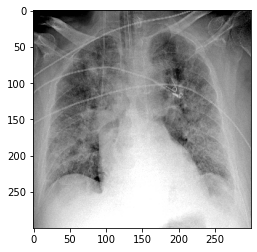

Covid


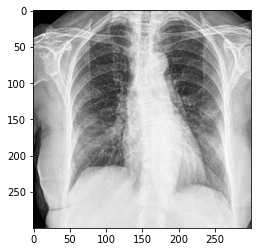

Covid


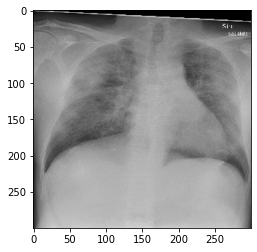

Covid


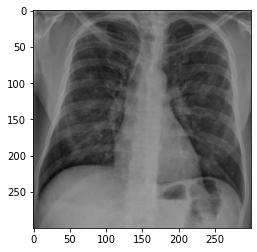

Covid


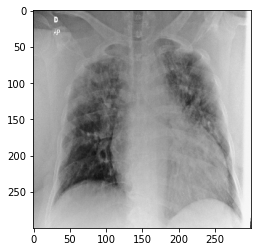

Covid


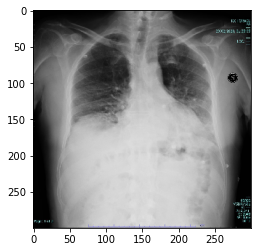

Covid


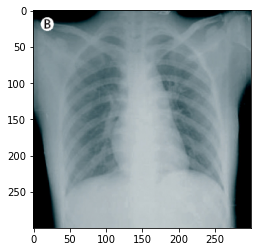

Covid


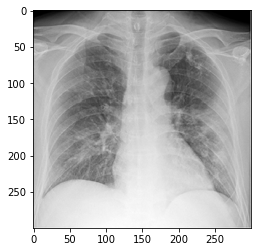

Covid


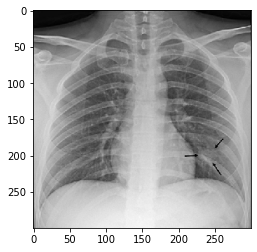

Covid


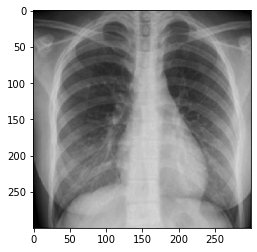

Covid


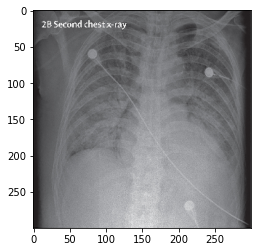

Covid


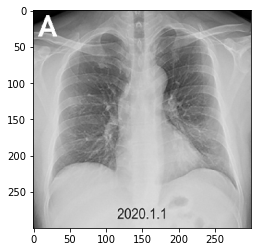

Covid


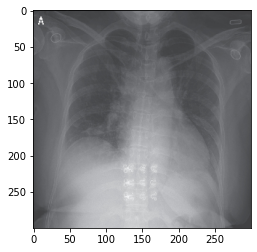

Covid


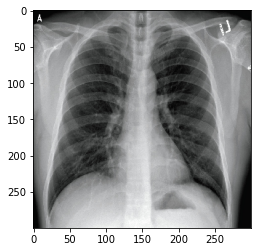

Covid


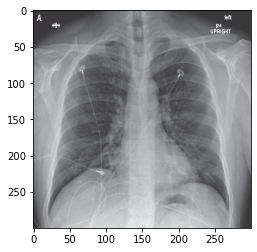

Covid


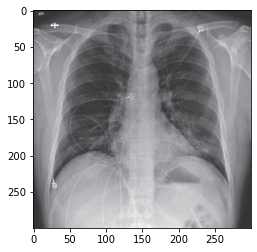

Covid


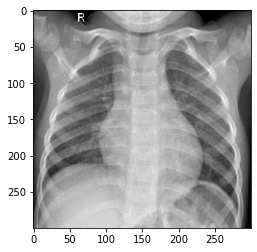

Covid


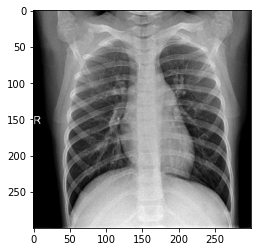

Normal


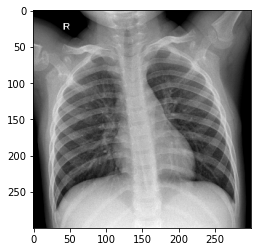

Covid


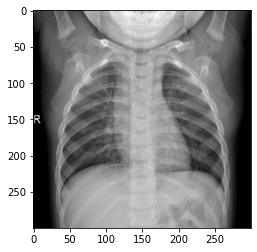

Normal


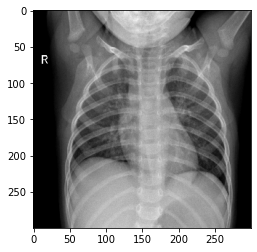

Normal


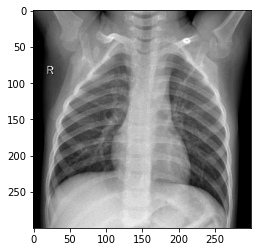

Normal


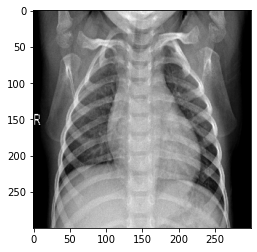

Normal


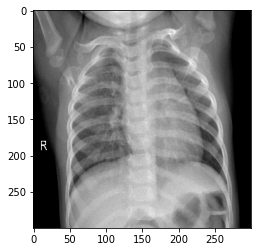

Normal


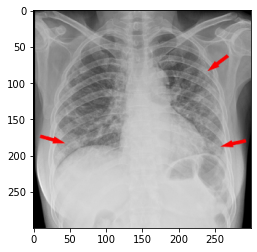

Covid


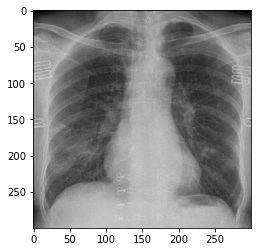

Covid


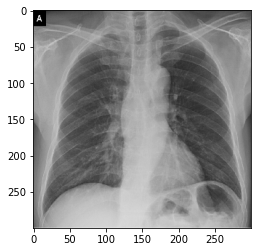

Covid


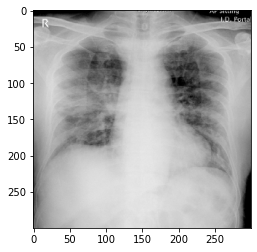

Covid


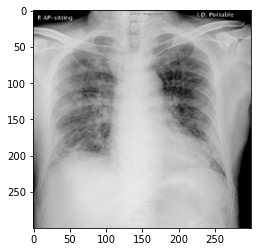

Covid


In [55]:
# Test model on Test dataset
for i in os.listdir(test_path):
    img = image.load_img(test_path+'//'+ i, target_size=(300,300))       # image size 300 x 300
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)          # convert images into an array
    X = np.expand_dims(X, axis = 0)      # add an additional dimension to array (to prevent error)
    images = np.vstack([X])              # join the images
    output = model.predict(images)       # model prediction
    if output == 0:                     
        print("Covid")
    else:
        print("Normal")
    

### Review Model Overfitting

In [51]:
# Test overfitting of the model, by looking at validation
model_fit_dict = model_fit.history
model_fit_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [52]:
# check overfitting
acc = model_fit_dict['accuracy']             # accuracy
val_acc = model_fit_dict['val_accuracy']     # validation accuracy
loss = model_fit_dict['loss']                # loss
val_loss = model_fit_dict['val_loss']        # validation loss   

runs = range(1, len(acc)+1)                  # range: start, stop

In [53]:
# Check range of runs
runs

range(1, 11)

This confirms that there are 10 runs of the model.

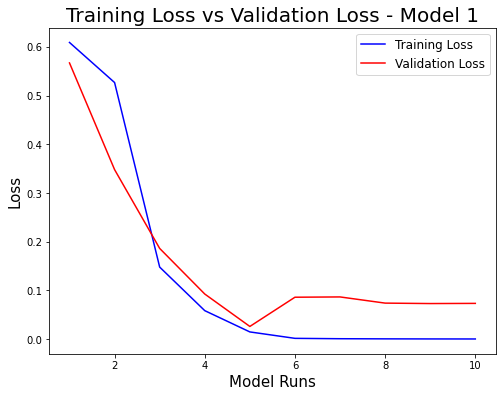

In [54]:
# plot
plt.figure(figsize = (8,6))
plt.plot(runs, loss, 'b', label='Training Loss')          

plt.plot(runs, val_loss, 'r', label='Validation Loss')
plt.title('Training Loss vs Validation Loss - Model 1', fontsize=20)
plt.xlabel('Model Runs', fontsize=15)                                         
plt.ylabel('Loss', fontsize=15)
plt.legend(fontsize=12)

From the plot we can see that as the number of model runs increases, both the Training loss and Validation loss decreases. However after 5 runs the validation loss slightly increases.